# Naive Bayes Notebook

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

## Testing for initial hypothesis LeaveOrNot ~ Gender + EverBenched + PaymentTier

In [71]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [72]:
employee = pd.get_dummies(employee, columns=["Gender", "EverBenched","PaymentTier"])
employee = employee.drop(columns=['Age', 'Education', 'ExperienceInCurrentDomain','City','JoiningYear','Duration'])

## Partition Data prior to training model

In [73]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
y = employee.loc[:, employee.columns == 'LeaveOrNot']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Running Naive Bayes Algorithm

In [75]:
nb = MultinomialNB().fit(X_train, y_train.values.ravel())

In [76]:
y_pred = nb.predict(X_test)

## Evaluating Naive Bayes Predictions

In [77]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          598   52    650
1          350  106    456
Total      948  158   1106


In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6365280289330922
Precision: 0.6708860759493671
Recall: 0.2324561403508772


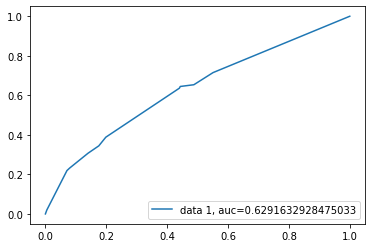

In [79]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [80]:
TP = ypred[1][1]
TN = ypred[0][0]
FP = ypred[1][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = FN + TP
TPN = TN + FN
TPP = FP + TP
GT = ypred['Total']['Total']

In [81]:
from tabulate import tabulate

In [82]:
accuracy = round((TN + TP) / GT, 4)
sensitivity = round(TP / TAP, 4)
specificity = round(TN / TAN, 4)
precision = round(TP / TPP, 4)
recall = round(TP / (TP + FN), 4)
pxr = precision * recall
ppr = precision + recall
F1 = round((pxr / ppr) * 2, 4)
F2 = round((pxr / ((4 * precision) + recall)) * 5, 4)
F05 = round((pxr / ((0.25 * precision) + recall)) * 1.25, 4)

In [83]:
data = [["Accuracy", "(TN+TP)/GT", accuracy], ["Error rate", "1-Accuracy", 1 - accuracy],
        ["Sensitivity = Recall", "TP/TAP", sensitivity], ["Specificity", "TN/TAN", specificity],
        ["Precision", "TP/TPP", precision], ["F1", "2*(precision*recall)/(precision+recall)", F1],
        ["F2", "5*(precision*recall)/((4*precision)+recall)", F2],
        ["F0.5", "1.25*(precision*recall)/((0.25*precision)+recall)", F05]]
col_names = ["Evaluation Measure", "Formula", "Value"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════╤═══════════════════════════════════════════════════╤═════════╕
│ Evaluation Measure   │ Formula                                           │   Value │
╞══════════════════════╪═══════════════════════════════════════════════════╪═════════╡
│ Accuracy             │ (TN+TP)/GT                                        │  0.6365 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Error rate           │ 1-Accuracy                                        │  0.3635 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Sensitivity = Recall │ TP/TAP                                            │  0.2325 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Specificity          │ TN/TAN                                            │  0.92   │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Precision            │ TP/TPP            

## Testing for alt hypothesis LeaveOrNot ~ City + Gender + Duration + PaymentTier

In [97]:
#Resetting Dataframe
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [85]:
employee = pd.get_dummies(employee, columns=["City","Gender","Duration", "PaymentTier"])
employee = employee.drop(columns = ['Age','Education','EverBenched','ExperienceInCurrentDomain', 'JoiningYear'])

## Partition Data prior to training model

In [86]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
y = employee.loc[:, employee.columns == 'LeaveOrNot']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Running Naive Bayes Algorithm

In [88]:
nb = MultinomialNB().fit(X_train, y_train.values.ravel())

In [89]:
y_pred = nb.predict(X_test)

## Evaluating Naive Bayes Predictions

In [90]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          579   71    650
1          219  237    456
Total      798  308   1106


In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7377938517179023
Precision: 0.7694805194805194
Recall: 0.5197368421052632


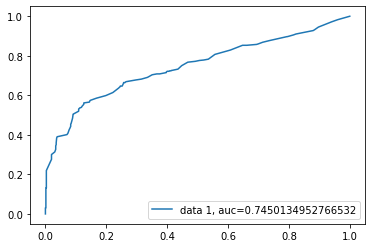

In [92]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [93]:
TP = ypred[1][1]
TN = ypred[0][0]
FP = ypred[1][0]
FN = ypred[0][1]
TAN = TN + FP
TAP = FN + TP
TPN = TN + FN
TPP = FP + TP
GT = ypred['Total']['Total']

In [94]:
from tabulate import tabulate

In [95]:
accuracy = round((TN + TP) / GT, 4)
sensitivity = round(TP / TAP, 4)
specificity = round(TN / TAN, 4)
precision = round(TP / TPP, 4)
recall = round(TP / (TP + FN), 4)
pxr = precision * recall
ppr = precision + recall
F1 = round((pxr / ppr) * 2, 4)
F2 = round((pxr / ((4 * precision) + recall)) * 5, 4)
F05 = round((pxr / ((0.25 * precision) + recall)) * 1.25, 4)

In [96]:
data = [["Accuracy", "(TN+TP)/GT", accuracy], ["Error rate", "1-Accuracy", 1 - accuracy],
        ["Sensitivity = Recall", "TP/TAP", sensitivity], ["Specificity", "TN/TAN", specificity],
        ["Precision", "TP/TPP", precision], ["F1", "2*(precision*recall)/(precision+recall)", F1],
        ["F2", "5*(precision*recall)/((4*precision)+recall)", F2],
        ["F0.5", "1.25*(precision*recall)/((0.25*precision)+recall)", F05]]
col_names = ["Evaluation Measure", "Formula", "Value"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒══════════════════════╤═══════════════════════════════════════════════════╤═════════╕
│ Evaluation Measure   │ Formula                                           │   Value │
╞══════════════════════╪═══════════════════════════════════════════════════╪═════════╡
│ Accuracy             │ (TN+TP)/GT                                        │  0.7378 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Error rate           │ 1-Accuracy                                        │  0.2622 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Sensitivity = Recall │ TP/TAP                                            │  0.5197 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Specificity          │ TN/TAN                                            │  0.8908 │
├──────────────────────┼───────────────────────────────────────────────────┼─────────┤
│ Precision            │ TP/TPP            